In [1]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Display
pd.options.display.float_format = "{:,.2f}".format


In [2]:
train_df = pd.read_parquet("FY24FY25.parquet")
test_df  = pd.read_parquet("FY26.parquet")

df = pd.concat([train_df, test_df], ignore_index=True)

print("Shape:", df.shape)
df.head()


Shape: (2986151, 24)


,ANSR / Tech Revenue FYTD,AR Outstanding,Billed Expenses FYTD,Billed Fees FYTD,Billed Revenue Days,Charged Hours FYTD,Client,Client ID,EAF Reserve FYTD,ETD Total Collections,...,FYTD Labor Costs,FYTD Unbilled Expenses,Location,MS,NUI ETD,Total Billed FYTD,Unbilled Revenue Days,Month,Week,Year
0,0.00,0.00,0.00,0.00,0.00,0.00,QUEST GLOBAL SERVICES PTE. LTD.,11421164,0.00,0.00,...,0.00,0.00,Bangalore,TMT,0.00,0.00,0.00,03 Sep,10,FY24
1,0.00,0.00,0.00,0.00,0.00,0.00,Industrial Energy Limited,11881305,0.00,0.00,...,0.00,0.00,East,IIC,0.00,0.00,0.00,03 Sep,10,FY24
2,0.00,0.00,0.00,0.00,0.00,0.00,Vini Cosmetics Private Limited,11453641,0.00,0.00,...,0.00,0.00,Mumbai,IIC,0.00,0.00,0.00,03 Sep,10,FY24
3,0.00,0.00,0.00,0.00,0.00,0.00,UNIPHORE SOFTWARE SYSTEMS PRIVATE LIMITED,12239544,0.00,0.00,...,0.00,0.00,Delhi,TMT,0.00,0.00,0.00,03 Sep,10,FY24
4,0.00,0.00,0.00,0.00,0.00,0.00,THE TATA POWER COMPANY LIMITED,11230405,0.00,0.00,...,0.00,0.00,Mumbai,IIC,0.00,0.00,0.00,03 Sep,10,FY24


In [3]:
weekly_fytd = (
    df.groupby(["Year", "Week"])["ANSR / Tech Revenue FYTD"]
      .sum()
      .reset_index()
)

# Keep valid week numbers only
weekly_fytd = weekly_fytd[weekly_fytd["Week"].between(1, 52)]


In [4]:
fy24 = weekly_fytd[weekly_fytd["Year"].astype(str).str.contains("24")][
    ["Week", "ANSR / Tech Revenue FYTD"]
].rename(columns={"ANSR / Tech Revenue FYTD": "FY24"})

fy25 = weekly_fytd[weekly_fytd["Year"].astype(str).str.contains("25")][
    ["Week", "ANSR / Tech Revenue FYTD"]
].rename(columns={"ANSR / Tech Revenue FYTD": "FY25"})

fy26 = weekly_fytd[weekly_fytd["Year"].astype(str).str.contains("26")][
    ["Week", "ANSR / Tech Revenue FYTD"]
].rename(columns={"ANSR / Tech Revenue FYTD": "FY26"})


In [5]:
fy25_plot = fy25.sort_values("Week").copy()

# Start FY25 from week 3
fy25_plot.loc[fy25_plot["Week"] < 3, "FY25"] = np.nan

# Fix known spike at week 34
w = 34
prev_val = fy25_plot.loc[fy25_plot["Week"] == w - 1, "FY25"].values
next_val = fy25_plot.loc[fy25_plot["Week"] == w + 1, "FY25"].values

if len(prev_val) and len(next_val):
    fy25_plot.loc[fy25_plot["Week"] == w, "FY25"] = (
        prev_val[0] + next_val[0]
    ) / 2


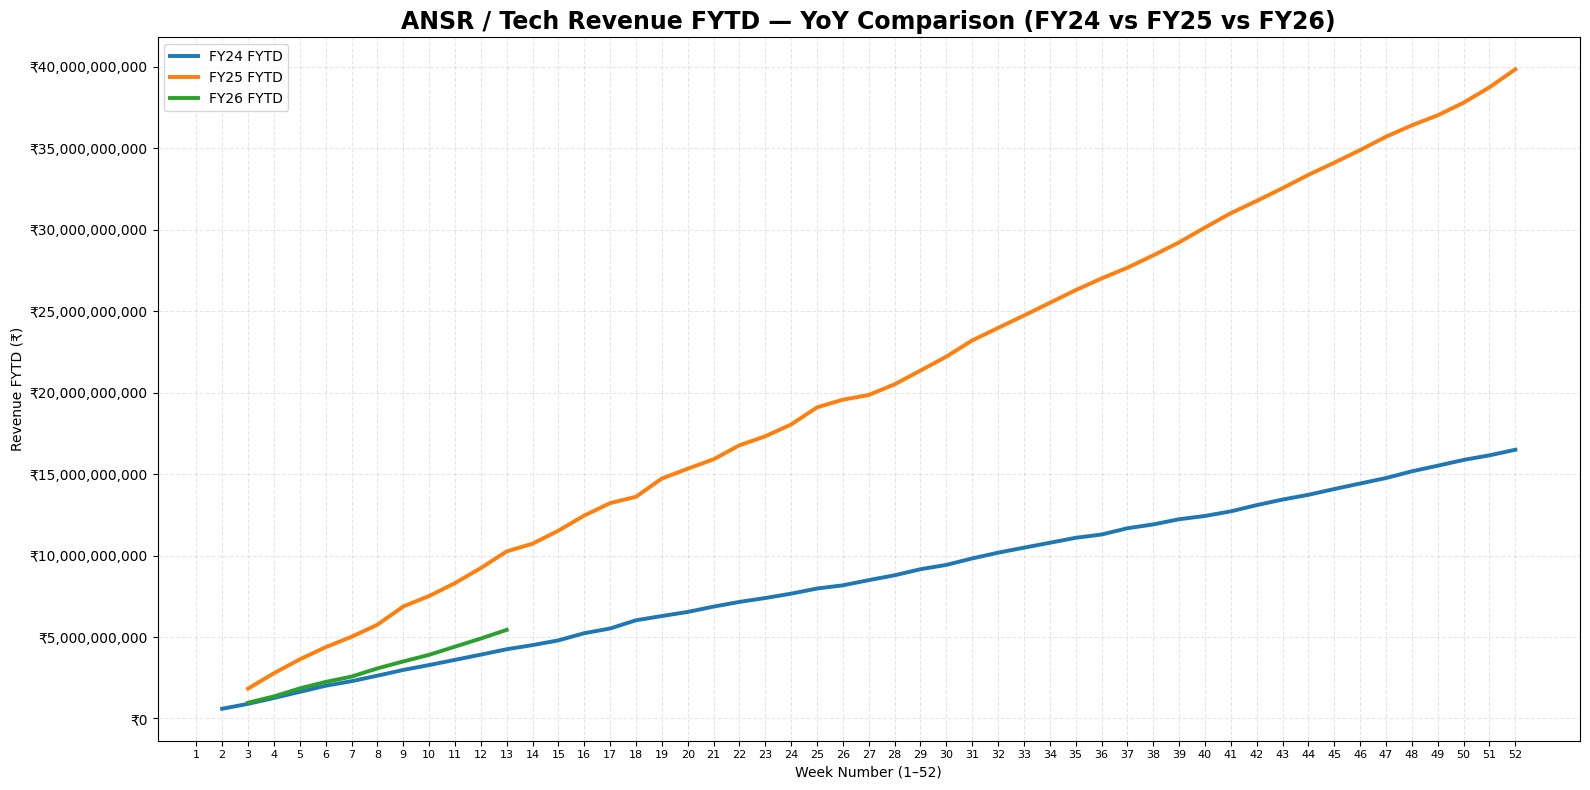

,Week,FY24 FYTD (₹),FY25 FYTD (₹),FY26 FYTD (₹)
0,1,NaN,NaN,NaN
1,2,"595,146,955.74",NaN,NaN
2,3,"896,384,585.76","1,832,907,369.54","966,836,957.51"
3,4,"1,255,661,249.62","2,777,030,141.90","1,352,008,364.07"
4,5,NaN,"3,628,741,036.68","1,844,864,435.29"
5,6,"2,007,916,702.01","4,374,179,009.44","2,242,474,275.42"
6,7,"2,286,815,056.52","5,013,446,871.36","2,569,416,301.04"
7,8,"2,624,209,199.40","5,753,450,644.34","3,071,510,031.32"
8,9,"2,978,040,295.93","6,872,024,185.72","3,500,054,996.89"
9,10,"3,277,722,262.99","7,517,417,735.98","3,905,335,926.80"


In [14]:
plt.figure(figsize=(16,8))

plt.plot(fy24["Week"], fy24["FY24"], label="FY24 FYTD", linewidth=2.8)
plt.plot(fy25_plot["Week"], fy25_plot["FY25"], label="FY25 FYTD", linewidth=2.8)
plt.plot(fy26["Week"], fy26["FY26"], label="FY26 FYTD", linewidth=2.8)

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue FYTD — YoY Comparison (FY24 vs FY25 vs FY26)",
    fontsize=17,
    weight="bold"
)

plt.xlabel("Week Number (1–52)")
plt.ylabel("Revenue FYTD (₹)")
plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()


weeks = pd.DataFrame({"Week": range(1, 53)})

fytd_table = (
    weeks
    .merge(fy24, on="Week", how="left")
    .merge(fy25_plot[["Week", "FY25"]], on="Week", how="left")
    .merge(fy26, on="Week", how="left")
)

fytd_table.columns = [
    "Week",
    "FY24 FYTD (₹)",
    "FY25 FYTD (₹)",
    "FY26 FYTD (₹)"
]

fytd_table.head(15)



Browser rendering 

In [76]:
import plotly.graph_objects as go
import plotly.io as pio

# Force browser rendering (no notebook dependency issues)
pio.renderers.default = "browser"

fig = go.Figure()

# ---------- FY24 ----------
fig.add_trace(go.Scatter(
    x=fy24["Week"],
    y=fy24["FY24"],
    mode="lines",
    name="FY24",
    line=dict(width=3, color="#4C78A8"),
    hovertemplate=(
        "<b>FY24</b><br>"
        "Week %{x}<br>"
        "FYTD Revenue: ₹%{y:,.0f}"
        "<extra></extra>"
    )
))

# ---------- FY25 (cleaned) ----------
fig.add_trace(go.Scatter(
    x=fy25_plot["Week"],
    y=fy25_plot["FY25"],
    mode="lines",
    name="FY25",
    line=dict(width=3, color="#F58518"),
    hovertemplate=(
        "<b>FY25</b><br>"
        "Week %{x}<br>"
        "FYTD Revenue: ₹%{y:,.0f}"
        "<extra></extra>"
    )
))

# ---------- FY26 ----------
fig.add_trace(go.Scatter(
    x=fy26["Week"],
    y=fy26["FY26"],
    mode="lines",
    name="FY26",
    line=dict(width=3, color="#54A24B"),
    hovertemplate=(
        "<b>FY26</b><br>"
        "Week %{x}<br>"
        "FYTD Revenue: ₹%{y:,.0f}"
        "<extra></extra>"
    )
))

# ---------- Layout ----------
fig.update_layout(
    title=dict(
        text="ANSR / Tech Revenue FYTD — YoY Trend Comparison",
        x=0.5,
        font=dict(size=22, color="#EAEAEA")
    ),

    xaxis=dict(
        title="Week Number",
        tickmode="linear",
        tick0=1,
        dtick=1,
        tickfont=dict(color="#BDBDBD"),
        showgrid=False
    ),

    yaxis=dict(
        title="ANSR / Tech Revenue FYTD (₹)",
        tickformat=",",
        tickfont=dict(color="#BDBDBD"),
        gridcolor="rgba(255,255,255,0.08)",
        showgrid=True
    ),

    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="center",
        x=0.5,
        font=dict(size=13, color="#EAEAEA")
    ),

    hovermode="x unified",

    plot_bgcolor="#121212",
    paper_bgcolor="#121212",

    width=1250,
    height=650,
    margin=dict(l=70, r=40, t=90, b=60)
)

fig.show()


In [66]:
# =========================================================
# 📈 Weekly Increment from FYTD (same as earlier logic)
# =========================================================

fytd_table["FY24_Weekly_Inc"] = fytd_table["FY24 FYTD (₹)"].diff()
fytd_table["FY25_Weekly_Inc"] = fytd_table["FY25 FYTD (₹)"].diff()
fytd_table["FY26_Weekly_Inc"] = fytd_table["FY26 FYTD (₹)"].diff()

# Handle Week 1 reset (FYTD starts fresh)
fytd_table.loc[fytd_table["Week"] == 1, [
    "FY24_Weekly_Inc",
    "FY25_Weekly_Inc",
    "FY26_Weekly_Inc"
]] = fytd_table.loc[fytd_table["Week"] == 1, [
    "FY24 FYTD (₹)",
    "FY25 FYTD (₹)",
    "FY26 FYTD (₹)"
]]

fytd_table.head(10)


,Week,FY24 FYTD (₹),FY25 FYTD (₹),FY26 FYTD (₹),FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"595,146,955.74",NaN,NaN,NaN,NaN,NaN
2,3,"896,384,585.76","1,832,907,369.54","966,836,957.51","301,237,630.02",NaN,NaN
3,4,"1,255,661,249.62","2,777,030,141.90","1,352,008,364.07","359,276,663.86","944,122,772.36","385,171,406.56"
4,5,NaN,"3,628,741,036.68","1,844,864,435.29",NaN,"851,710,894.78","492,856,071.23"
5,6,"2,007,916,702.01","4,374,179,009.44","2,242,474,275.42",NaN,"745,437,972.76","397,609,840.12"
6,7,"2,286,815,056.52","5,013,446,871.36","2,569,416,301.04","278,898,354.51","639,267,861.92","326,942,025.62"
7,8,"2,624,209,199.40","5,753,450,644.34","3,071,510,031.32","337,394,142.88","740,003,772.98","502,093,730.27"
8,9,"2,978,040,295.93","6,872,024,185.72","3,500,054,996.89","353,831,096.53","1,118,573,541.38","428,544,965.57"
9,10,"3,277,722,262.99","7,517,417,735.98","3,905,335,926.80","299,681,967.06","645,393,550.26","405,280,929.92"


In [77]:
# Start from your existing fytd_table
inc_plot = fytd_table.sort_values("Week").copy()

# Weekly increment = week-over-week change
inc_plot["FY24_Weekly_Inc"] = inc_plot["FY24 FYTD (₹)"].diff()
inc_plot["FY25_Weekly_Inc"] = inc_plot["FY25 FYTD (₹)"].diff()

# Handle Week 1 reset properly
inc_plot.loc[inc_plot["Week"] == 1, "FY24_Weekly_Inc"] = inc_plot.loc[
    inc_plot["Week"] == 1, "FY24 FYTD (₹)"
]

inc_plot.loc[inc_plot["Week"] == 1, "FY25_Weekly_Inc"] = inc_plot.loc[
    inc_plot["Week"] == 1, "FY25 FYTD (₹)"
]




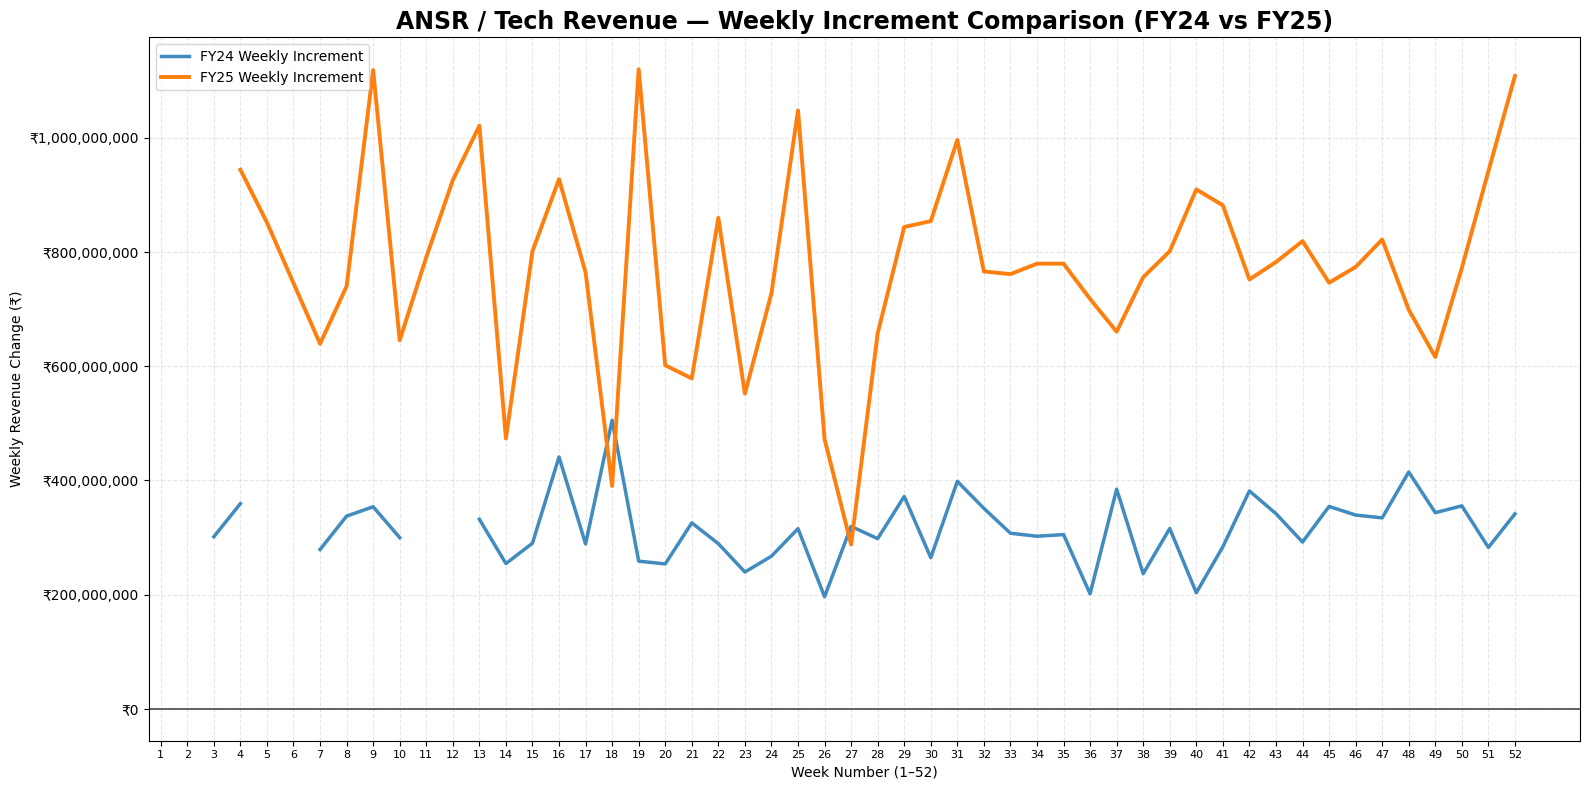

In [81]:
plt.figure(figsize=(16,8))

# FY24 Weekly Increment
plt.plot(
    inc_plot["Week"],
    inc_plot["FY24_Weekly_Inc"],
    label="FY24 Weekly Increment",
    linewidth=2.5,
    color="#1f77b4",
    alpha=0.85
)

# FY25 Weekly Increment
plt.plot(
    inc_plot["Week"],
    inc_plot["FY25_Weekly_Inc"],
    label="FY25 Weekly Increment",
    linewidth=2.8,
    color="#ff7f0e"
)

# Zero baseline (critical for increment analysis)
plt.axhline(
    0,
    color="black",
    linewidth=1.2,
    alpha=0.7
)

# Axis formatting
plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue — Weekly Increment Comparison (FY24 vs FY25)",
    fontsize=17,
    weight="bold"
)

plt.xlabel("Week Number (1–52)")
plt.ylabel("Weekly Revenue Change (₹)")

plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()


In [73]:
# Ensure full week index
weeks = pd.DataFrame({"Week": range(1, 53)})

inc_plot_full = (
    weeks
    .merge(inc_plot, on="Week", how="left")
)


In [74]:
inc_plot_full["FY24_Weekly_Inc"] = (
    inc_plot_full["FY24_Weekly_Inc"]
    .interpolate(method="linear")
)

inc_plot_full["FY25_Weekly_Inc"] = (
    inc_plot_full["FY25_Weekly_Inc"]
    .interpolate(method="linear")
)


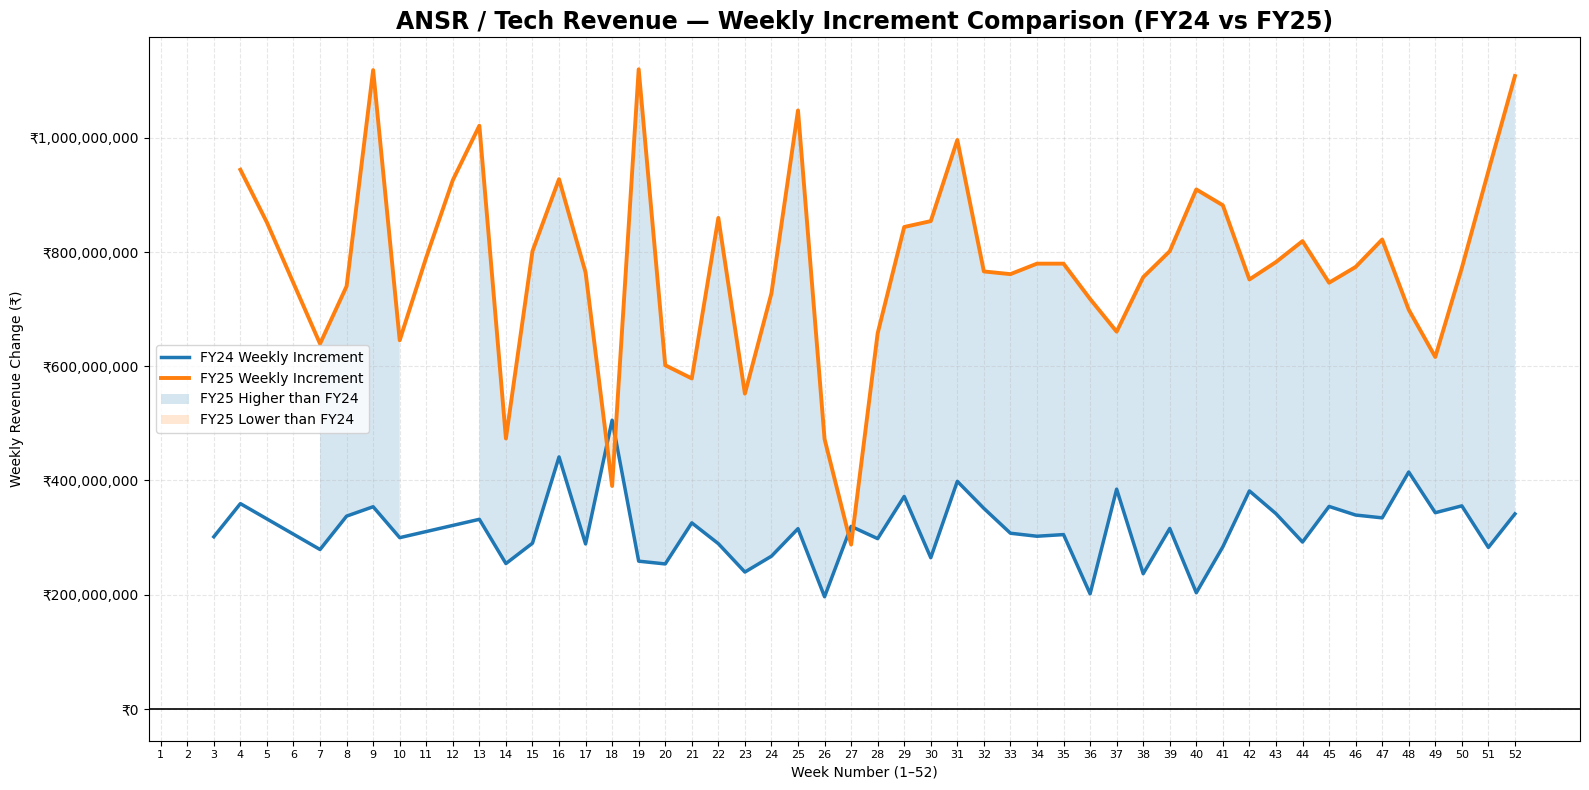

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    label="FY24 Weekly Increment",
    linewidth=2.5
)

plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY25_Weekly_Inc"],
    label="FY25 Weekly Increment",
    linewidth=2.8
)

plt.axhline(0, color="black", linewidth=1.2)
# plt.fill_between(
#     inc_plot["Week"],
#     inc_plot["FY24_Weekly_Inc"],
#     inc_plot["FY25_Weekly_Inc"],
#     where=(inc_plot["FY25_Weekly_Inc"] > inc_plot["FY24_Weekly_Inc"]),
#     interpolate=True,
#     alpha=0.18,
#     label="FY25 Higher than FY24"
# )

# plt.fill_between(
#     inc_plot["Week"],
#     inc_plot["FY24_Weekly_Inc"],
#     inc_plot["FY25_Weekly_Inc"],
#     where=(inc_plot["FY25_Weekly_Inc"] < inc_plot["FY24_Weekly_Inc"]),
#     interpolate=True,
#     alpha=0.18,
#     label="FY25 Lower than FY24"
# )


plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue — Weekly Increment Comparison (FY24 vs FY25)",
    fontsize=17,
    weight="bold"
)

plt.xlabel("Week Number (1–52)")
plt.ylabel("Weekly Revenue Change (₹)")
plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()
